In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import jaccard_score
from sklearn.metrics import plot_roc_curve

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving pima-indians-diabetes.data.csv to pima-indians-diabetes.data (1).csv


In [ ]:
file="pima-indians-diabetes.data.csv"
rnames=['preg','plas','pres','skin','test','mass','pedi','age','class']
data=pd.read_csv(file,names=rnames)

In [ ]:
data.head()
data.shape

(768, 9)

In [ ]:
feature_df=data[['preg','plas','pres','skin','test','mass','pedi','age']]
X=np.asarray(feature_df)
y=np.asarray(data['class'])

In [ ]:
X[:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

In [ ]:
y[:5]

array([1, 0, 1, 0, 1])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=3)
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


# Gaussian Naive Bayes

In [ ]:
gnb=GaussianNB()
y_pred=gnb.fit(X_train,y_train).predict(X_test)

In [ ]:
gnb_acc=accuracy_score(y_test,y_pred)*100
print('Accuracy of the GNB classifier:',gnb_acc,'\n')
gnb_cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix of the GNB classifier:\n',gnb_cm,'\n')
gnb_cr=classification_report(y_test,y_pred)
print('Classification Report of the GNB classifier:\n',gnb_cr)
gnb_error=100-gnb_acc
print('Error of the GNB classifier:',gnb_error)

Accuracy of the GNB classifier: 71.42857142857143 

Confusion Matrix of the GNB classifier:
 [[72 20]
 [24 38]] 

Classification Report of the GNB classifier:
               precision    recall  f1-score   support

           0       0.75      0.78      0.77        92
           1       0.66      0.61      0.63        62

    accuracy                           0.71       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.71      0.71      0.71       154

Error of the GNB classifier: 28.57142857142857


# Multinomial Naive Bayes

In [ ]:
mnb=MultinomialNB()
y_pred1=mnb.fit(X_train,y_train).predict(X_test)

In [ ]:
mnb_acc=accuracy_score(y_test,y_pred1)*100
print('Accuracy of the MNB classifier:',mnb_acc,'\n')
mnb_cm=confusion_matrix(y_test,y_pred1)
print('Confusion Matrix of the MNB classifier:\n',mnb_cm,'\n')
mnb_cr=classification_report(y_test,y_pred1)
print('Classification Report of the MNB classifier:\n',mnb_cr)


Accuracy of the MNB classifier: 52.5974025974026 

Confusion Matrix of the MNB classifier:
 [[60 32]
 [41 21]] 

Classification Report of the MNB classifier:
               precision    recall  f1-score   support

           0       0.59      0.65      0.62        92
           1       0.40      0.34      0.37        62

    accuracy                           0.53       154
   macro avg       0.50      0.50      0.49       154
weighted avg       0.51      0.53      0.52       154



In [ ]:
dtree=DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=4,min_samples_split=2,random_state=2)
dtree_y_pred=dtree.fit(X_train,y_train).predict(X_test)
dtree_acc=accuracy_score(y_test,dtree_y_pred)*100
print('Accuracy of the Decision tree classifier:',dtree_acc)
dtree_cm=confusion_matrix(y_test,dtree_y_pred)
print('Confusion Matrix of the Decision tree classifier:\n',dtree_cm)
dtree_cr=classification_report(y_test,dtree_y_pred)
print('Classification Report of the Decision tree classifier:\n',dtree_cr)


Accuracy of the Decision tree classifier: 60.3896103896104
Confusion Matrix of the Decision tree classifier:
 [[92  0]
 [61  1]]
Classification Report of the Decision tree classifier:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75        92
           1       1.00      0.02      0.03        62

    accuracy                           0.60       154
   macro avg       0.80      0.51      0.39       154
weighted avg       0.76      0.60      0.46       154



In [ ]:
gnb_y_pred_prob=gnb.predict_proba(X_test)[:,1]
fpr1,tpr1,thresholds1=roc_curve(y_test,gnb_y_pred_prob)

mnb_y_pred_prob=mnb.predict_proba(X_test)[:,1]
fpr2,tpr2,thresholds2=roc_curve(y_test,mnb_y_pred_prob)

dtree_y_pred_prob=dtree.predict_proba(X_test)[:,1]
fpr3,tpr3,thresholds3=roc_curve(y_test,dtree_y_pred_prob)

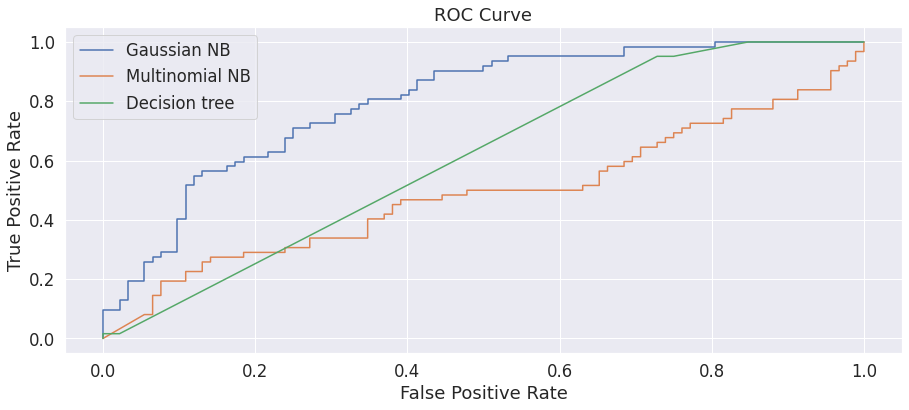

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
#plt.plot(fpr, tpr)
#plt.plot([0,1],[0,1],'k--')
plt.plot(fpr1,tpr1,label="Gaussian NB")
plt.plot(fpr2,tpr2,label="Multinomial NB")
plt.plot(fpr3,tpr3,label="Decision tree")

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()